# Pymaceuticals Inc.
---

### Analysis

Our Analysis arrived
 

In [113]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = study_results.merge(mouse_metadata)



# Display the data table for preview
combined_df.head(20)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [114]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [115]:
# Checking the number of mice.
combined_df ["Mouse ID"].nunique()

249

In [116]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mouse = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"],keep="last")]["Mouse ID"].unique()[0]
dup_mouse

'g989'

In [117]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df[combined_df["Mouse ID"]== dup_mouse]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [118]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'] != dup_mouse]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [119]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()


248

## Summary Statistics

In [120]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
s1 = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
s2 = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
s3 = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
s4 = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
s5 = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.concat([s1, s2, s3, s4, s5], axis=1)
summary_df.columns = ['Mean', 'Median', 'Variance', 'STD', 'Stadard Error']
summary_df


,Mean,Median,Variance,STD,Stadard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [121]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median', 'var', 'std', 'sem'])
summary_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [122]:
# Get total numbers of mice by drug
drug_df = clean_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)'].sort_values(ascending=False)
drug_df

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Tumor Volume (mm3), dtype: int64

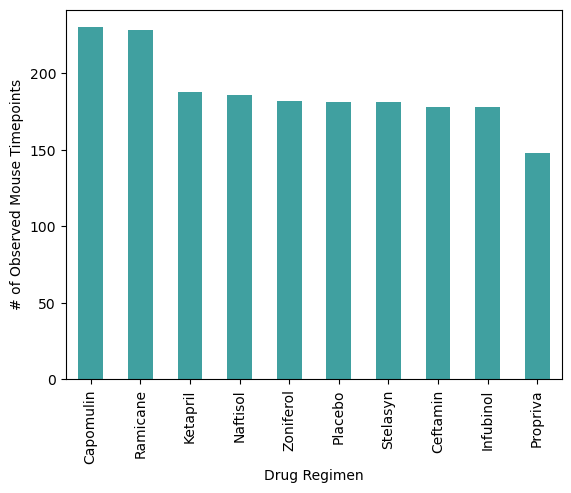

In [123]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_fig1 = drug_df.plot(kind='bar', color='teal', alpha=.75,
                          xlabel='Drug Regimen',
                          ylabel='# of Observed Mouse Timepoints')
plt.show()


Text(0, 0.5, '# of Observed Mouse Timepoints')

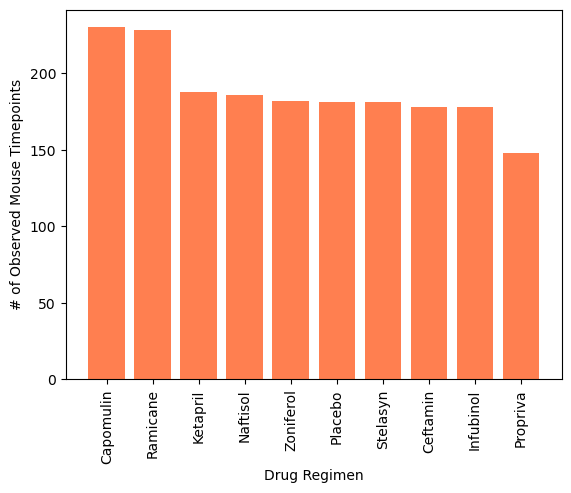

In [124]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_df.index.values, drug_df.values, color='coral')
plt.xticks(drug_df.index.values, rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

<Axes: ylabel='Gender'>

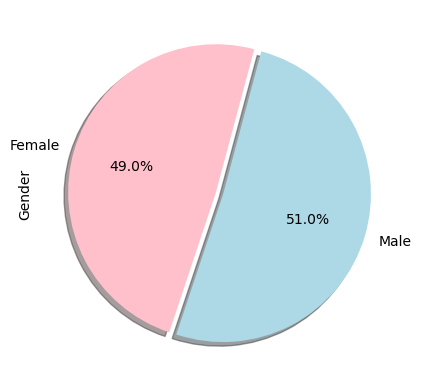

In [125]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colors = ['pink', 'lightblue']
explode = (0.05, 0)
mouse_gender = clean_df.groupby('Sex')['Mouse ID'].count()
mouse_gender.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=75, label='Gender', shadow=True, explode=explode)


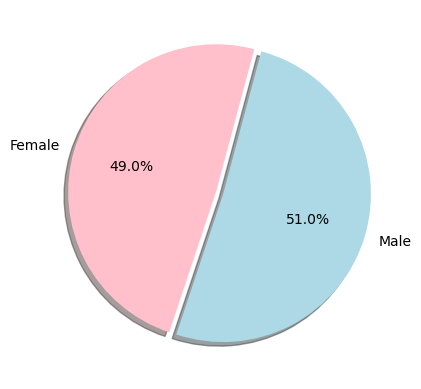

In [126]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
explode = (0.05, 0)
plt.pie(mouse_gender, colors=colors, autopct='%1.1f%%', shadow=True, startangle=75, labels=labels, explode=explode)
plt.show()

## Quartiles, Outliers and Boxplots

In [127]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint, clean_df, on=['Mouse ID', 'Timepoint'], how='left')
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [128]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    t_v = merged_df.loc[merged_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)'].rename(f'{drug}')
    
    # add subset
    tumor_vol_data.append(t_v)

    # Determine outliers using upper and lower bounds
    quartiles = t_v.quantile([0.25, 0.50, 0.75])
    lower = quartiles[0.25]
    upper = quartiles[0.75]
    iqr = upper - lower
    lowerBound = lower - (1.5 * iqr)
    upperBound = upper + (1.5 * iqr)
    outliers = t_v.loc[(t_v < lowerBound) | (t_v > upperBound)]
    
    if len(outliers) == 0:
        print(f"{drug}'s potential outliers: None")
    
    else:
        print(f"{drug}'s potential outliers: {outliers.iloc[0]}")

Capomulin's potential outliers: None
Ramicane's potential outliers: None
Infubinol's potential outliers: 36.3213458
Ceftamin's potential outliers: None


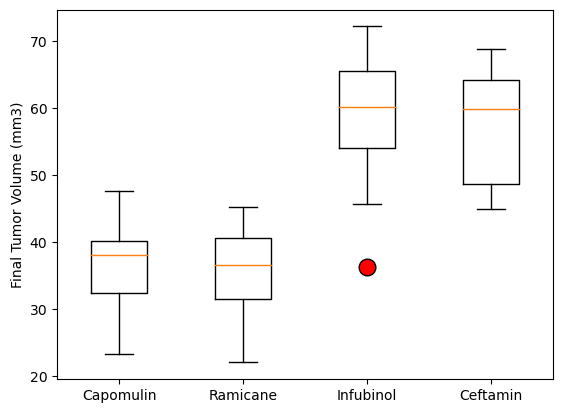

In [129]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure()
plt.boxplot(tumor_vol_data, labels = treatments, flierprops = dict(markerfacecolor = 'red', markersize = 12))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

In [130]:
clean_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


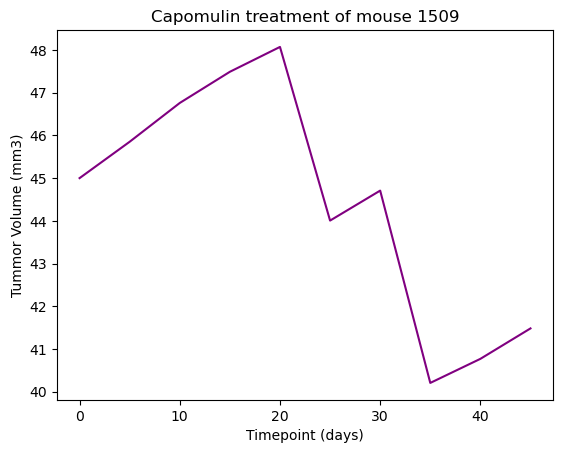

In [131]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
mouse_l509 = cap_df.loc[cap_df['Mouse ID'] == 'l509']
plt.plot(mouse_l509['Timepoint'],mouse_l509['Tumor Volume (mm3)'], color='purple')

plt.xlabel('Timepoint (days)')
plt.ylabel('Tummor Volume (mm3)')
plt.title('Capomulin treatment of mouse 1509')
plt.show()

/var/folders/q0/dqx9mszn2xl8nmv3rp8s7rlr0000gn/T/ipykernel_10908/19392942.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_tumor = cap_df.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)']
/var/folders/q0/dqx9mszn2xl8nmv3rp8s7rlr0000gn/T/ipykernel_10908/19392942.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_weight = cap_df.groupby(['Mouse ID']).mean()['Weight (g)']


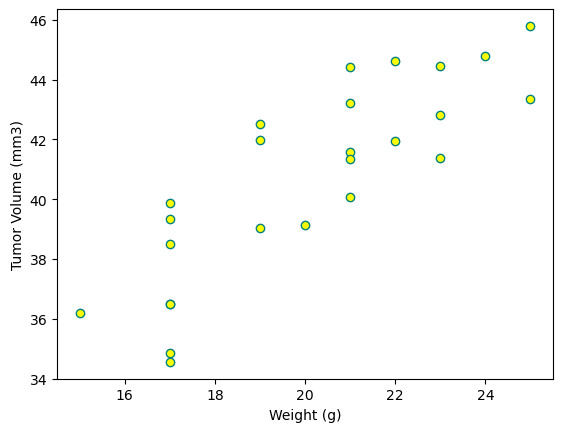

In [132]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor = cap_df.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)']
avg_weight = cap_df.groupby(['Mouse ID']).mean()['Weight (g)']

plt.scatter(avg_weight, avg_tumor, color='yellow', edgecolor='teal')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [189]:
avg_tumor_df = avg_tumor.to_frame()
mm3 = avg_tumor_df.reset_index()
tv_mm3 = mm3['Tumor Volume (mm3)']
tv_mm3

# Convert a series to a Data Frame 
avg_weight_df = avg_weight.to_frame()
# 
weight = avg_weight_df.reset_index()
c_weight = weight['Weight (g)']
c_weight


0     22.0
1     21.0
2     17.0
3     19.0
4     22.0
5     24.0
6     20.0
7     23.0
8     21.0
9     21.0
10    19.0
11    17.0
12    19.0
13    25.0
14    17.0
15    25.0
16    17.0
17    23.0
18    17.0
19    17.0
20    21.0
21    23.0
22    21.0
23    15.0
24    17.0
Name: Weight (g), dtype: float64

The correlation between mouse weight and tumor volume under Capomulin treatment is : 0.84


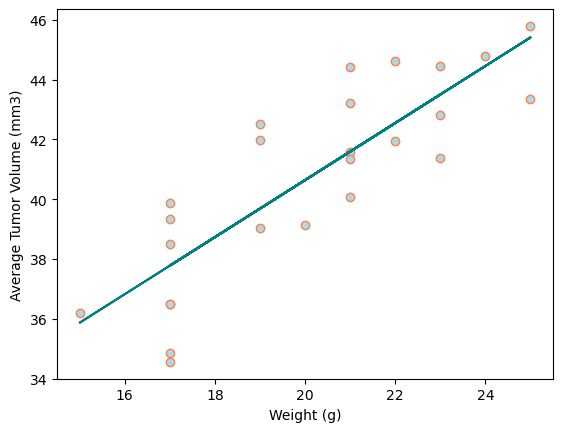

In [191]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = round(st.pearsonr(c_weight, tv_mm3)[0],2)
print(f'The correlation between mouse weight and tumor volume under Capomulin treatment is : {correlation}')


slope, intercept, rvalue, pvalue, stderr = stats.linregress(c_weight, tv_mm3)
#line_fit = x_value * slope + intercept The y is =mx+b y_value = m=slope * x=x_values + b=intercept
line_fit = c_weight * slope + intercept 

plt.scatter(c_weight, tv_mm3, facecolor='lightblue', edgecolor='coral')
plt.plot(c_weight, line_fit,'-', color='teal') #x_values, line_fit=Y_value)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()